# Big Picture

A Support Vector Machine is a supervised machine learning algorithm that can be used for classification and regression purposes. For this project it will be used for a classification problem. The idea behind SVM is to divide the dataset into two classes (labels) by finding the dividing line or "hyperplane". The further the data points are from the hyperplane, the more confident we are that they have been correctly classified. My dataset can be narrowed down to a simple binary classification problem which is why I am using SVM on it. 

# Get the Data

In [94]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import itertools

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

%matplotlib inline

Set data to a variable

In [96]:
df= pd.read_csv('fashion-mnist_train.csv')

Set X to data and y to labels

In [98]:
X = df.iloc[:,1:785].as_matrix() 
y = df['label']

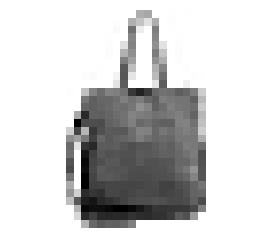

In [100]:
instance = X[20000]
instance_image = instance.reshape(28,28)
plt.imshow(instance_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [101]:
instance_label = y[20000]
instance_label

8

# Non-linear Seperation Visualization

It is hard to show non-linear seperation of data that are merely pixels associated with a label

# Scale the data

It is important to scale the inputs when using SVM because if you do not scale all features to comparable ranges, the features with the largest range will completely dominate in the computation of the kernal matrix

# Classifiers, Training, Performance Measures

The instance (image) is of a bag. It is correctly labeled. Now we will classify whether everything else is a bag or not

In [102]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [103]:
y_train_8 = (y_train == 8)

In [104]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

In [105]:
svm_clf.fit(X_train, y_train_8)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [106]:
svm_clf.predict([instance])

array([ True])

Great! It is correctly saying that the 20001 entry is a bag. Now lets check the accuracy of our classifier using cross validation, confusion matrix, precision and recall, f-1 score, ROC Curve, and area under ROC curve

In [107]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf, X_train, y_train_8, cv=3, scoring="accuracy")

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([0.98165, 0.9843 , 0.98135])

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, X_train, y_train_8, cv=3)
confusion_matrix(y_train_8, y_train_pred)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[53562,   438],
       [  602,  5398]], dtype=int64)

In [109]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_8, y_train_pred)

0.9249485949280329

In [110]:
recall_score(y_train_8, y_train_pred)

0.8996666666666666

In [111]:
from sklearn.metrics import f1_score
f1_score(y_train_8, y_train_pred)

0.9121324771882392

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


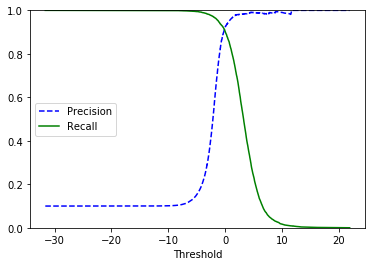

In [112]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(svm_clf, X_train, y_train_8, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

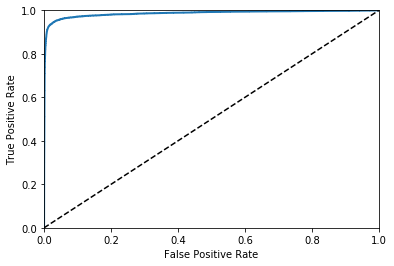

In [113]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_8, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [114]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_8, y_scores)

0.9857766018518518

Through the above methods, we get above 98% accuracy (58,799 instances were correctly predicted out of the 59,999 total) and see that the svm classifier is really useful for our binary classification methods. Now lets compare it Stochastic Gradient Descent 

In [115]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [116]:
sgd_clf.predict([instance])

array([ True])

Okay so it correctly predicted that item is a bag. Lets check the accuracy

In [117]:
cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Owner\Anaconda3\lib\sit

array([0.975  , 0.9769 , 0.97625])

So it is a little less accurate that SVM. 

In [118]:
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)
confusion_matrix(y_train_8, y_train_pred_sgd)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Owner\Anaconda3\lib\sit

array([[53333,   667],
       [  770,  5230]], dtype=int64)

In [119]:
precision_score(y_train_8, y_train_pred_sgd)

0.886891639816856

In [120]:
recall_score(y_train_8, y_train_pred_sgd)

0.8716666666666667

In [121]:
from sklearn.metrics import f1_score
f1_score(y_train_8, y_train_pred_sgd)

0.8792132470370682

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Owner\Anaconda3\lib\sit

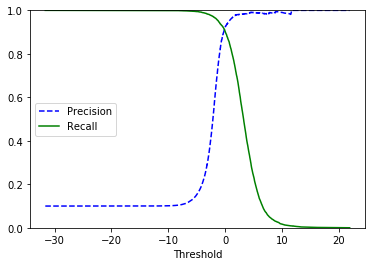

In [122]:
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

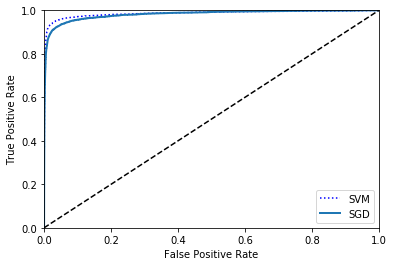

In [124]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_8, y_scores_sgd)
plt.plot(fpr, tpr, "b:", label="SVM")
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD")
plt.legend(loc="lower right")
plt.show()

In [125]:
roc_auc_score(y_train_8, y_scores_sgd)

0.9817277037037038

SVM outperforms SGD slightly

# Integrate RBF Kernal

In [132]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X_train, y_train_8)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [133]:
rbf_kernel_svm_clf.predict([instance])

array([False])

In [ ]:
cross_val_score(rbf_kernel_svm_clf, X_train, y_train_8, cv=3, scoring="accuracy")

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


If the model is overfitting then I need to reduce my gamma where as if it is underfitting, I should increase it. This is proportional to the C hyperparameter as well.

# Presentation and Future

After all of the classifiers I have presented to you, SVM is the best one thus far. It has proven to be highly accurate as a binary classifier and can prove worth as a classifier for several more datasets. Moving forward we might want to classify several different classifiers at once, so maybe we should take a polynomial regression approach and use in combination the polynomial kernel. We would need to find a polynomial degree representative of the number of classes so.. a 10 degree polynomial. 

In [ ]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree = 10, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X_train, y_train_8)